In [3]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assignment 1

In [7]:
#a)
df = pd.DataFrame({"Supplier1":[360, 40], "Supplier2":[570, 30]}, index=['Good tires', 'Defective Tires'])
display(df)

,Supplier1,Supplier2
Good tires,360,570
Defective Tires,40,30


In [3]:
#b)
display("Probability of supplier 1 Given that its defective, P(supp1|Deff) ",df.loc["Defective Tires","Supplier1"]/df.loc["Defective Tires",:].sum())

'Probability of supplier 1 Given that its defective, P(supp1|Deff) '

0.5714285714285714

In [4]:
#c)

chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(df, correction=False)
print("p_value = "+ str(p_val))
print("Very significantly corrospond to a significance level of 0.01. Since the p_value is smaller than this, we can reject H0. The tires quality does depend on the supplier.  ")

p_value = 0.0023983184964129424
Very significantly corrospond to a significance level of 0.01. Since the p_value is smaller than this, we can reject H0. The tires quality does depend on the supplier.  


In [5]:
# could also be calculated by hand:


![Calculation by hand](https://imgur.com/0nOxLRe.png)

# Assignment 2

In [10]:
# Assignment 1   1.7 std=10cm
X = np.array([1.83, 1.96, 1.76, 1.78, 1.68])
 
#1)
print('sample mean = ', X.mean())

sample mean =  1.802


In [11]:
#2)
print('sample var = ', X.var(ddof=1)) #sample var =  0.01072

sample var =  0.01072


In [12]:
#3)
print('sample std = ', X.std(ddof=1))#sample std =  0.1035

sample std =  0.10353743284435828


In [13]:
#4)
prob = stats.norm.cdf(X.mean(), loc=1.7, scale=0.1/np.sqrt(len(X)))
p_val = 2*min(prob, 1-prob)
print('p_value = ', p_val) # p_value =  0.02256

p_value =  0.022560915657808822


In [14]:
#5) 
print('yes as P_value is less than the significanse level 5%')

yes as P_value is less than the significanse level 5%


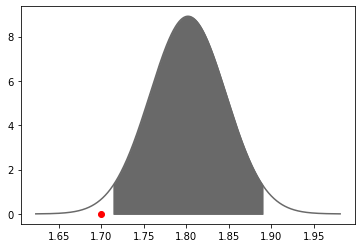

In [19]:
#6)
mean=1.7
sd = 0.1
x = np.linspace(X.mean()-4*sd/np.sqrt(len(X)), X.mean()+4*sd/np.sqrt(len(X)), 1000)
y = stats.norm.pdf(x, X.mean(), sd/np.sqrt(len(X)))
plt.plot(x,y, color = 'dimgrey')
 
b_min = stats.norm.ppf(0.025, X.mean(), sd/np.sqrt(len(X)))
b_max = stats.norm.ppf(0.975, X.mean(), sd/np.sqrt(len(X)))
 
xf = np.linspace(b_min,b_max, 100)
plt.fill_between(xf, stats.norm.pdf(xf, X.mean(), sd/np.sqrt(len(X))), color = 'dimgrey')
 
plt.plot(mean, 0, 'ro')
plt.show()

In [14]:
#7)
prob = stats.t.cdf(X.mean(), df=len(X)-1, loc=1.7, scale=X.std(ddof=1)/np.sqrt(len(X)))
p_val = 2*min(prob, 1-prob)
print('p_value = ', p_val) #p_value =  0.092357

p_value =  0.09235730899034578


In [15]:
#8)
print('No as the P_value is bigger than than 0.05. The SMP-teacher might be right. ')

No as the P_value is bigger than than 0.05. The SMP-teacher might be right. 


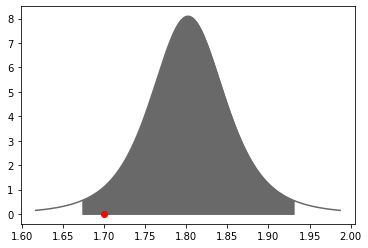

In [22]:
#9)
plt.figure()
mean=1.7
x = np.linspace(X.mean()-4*X.std(ddof=1)/np.sqrt(len(X)), X.mean()+4*X.std(ddof=1)/np.sqrt(len(X)), 1000)
y = stats.t.pdf(x,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
plt.plot(x,y, color = 'dimgrey')
 
b_min = stats.t.ppf(0.025,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
b_max = stats.t.ppf(0.975,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
 
xf = np.linspace(b_min,b_max, 1000)
plt.fill_between(xf, stats.t.pdf(xf,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X))), color = 'dimgrey')
 
plt.plot(mean, 0, 'ro')
plt.show()

# Assignment 3

In [17]:
df = pd.DataFrame({"Urban community":[20, 180], "Rural community":[10, 140]}, index=['Breast cancer', 'No cancer'])
display(df)

chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(df, correction=False)
print("p_value = "+ str(p_val))
print("Significantly corrospond to a significance level of 0.05. Since the p_value is greater than this, we cannot reject H0. The risk of getting breastcancer might be independent of rural area. ")

,Urban community,Rural community
Breast cancer,20,10
No cancer,180,140


p_value = 0.2702893848016953
Significantly corrospond to a significance level of 0.05. Since the p_value is greater than this, we cannot reject H0. The risk of getting breastcancer might be independent of rural area. 


In [18]:
# Can also be calculated by hand:

![Calculation by hand](https://imgur.com/pcRDpFg.png)

# Assignment 4

In [19]:
df = pd.DataFrame({"Blueish":[46, 42,52], "Reddish":[82, 38,40], "Greenish":[72, 20,8]}, index=['Display 1','Display 2','Display 3'])
display(df)

chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(df, correction=False)
print("p_value = "+ str(p_val))
print("As 3.795777297500132e-08<0.05 the null hypothesis can be rejected. The hue bias does depend on the display ")

,Blueish,Reddish,Greenish
Display 1,46,82,72
Display 2,42,38,20
Display 3,52,40,8


p_value = 3.795777297500132e-08
As 3.795777297500132e-08<0.05 the null hypothesis can be rejected. The hue bias does depend on the display 


# Assignment 5

In [33]:
data = pd.read_excel("Titanic.xlsx") 
 
print (data.head(7)) 
 
#1)
data_crosstab = pd.crosstab(data['survived'], data['pclass'], margins = False) 
print(data_crosstab)


   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   

       age  sibsp  parch  alone  ticket      fare    cabin embarked boat  \
0  29.0000      0      0      1   24160  211.3375       B5        S    2   
1   0.9167      1      2      0  113781  151.5500  C22 C26        S   11   
2   2.0000      1      2      0  113781  151.5500  C22 C26        S  NaN   
3  30.0000      1      2      0  113781  151.5500  C22 

In [34]:
#2)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print("As the p-value is less than 0.05 survival rate depends on class")

'p-value = 1.7208259588256052e-28'

'degrees of freedom = 2'

As the p-value is less than 0.05 survival rate depends on class


In [35]:
#3)
data_crosstab = pd.crosstab(data['survived'], data['sex'], margins = True) 
print(data_crosstab)

sex       female  male   All
survived                    
0            127   682   809
1            339   161   500
All          466   843  1309


In [36]:
#4)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print("As the p-value is less than 0.05 survival rate depends on gender")

'p-value = 6.506436068205604e-78'

'degrees of freedom = 4'

As the p-value is less than 0.05 survival rate depends on gender


# Assignment 6

In [23]:
X= np.array([252.0 , 253.0 , 249.0 , 248.1, 251.7, 245.5, 249.6, 250.4, 252.5, 250.6, 249.7, 248.2, 249.5, 247.6, 253.5, 247.6, 248.5, 252.3, 253.7, 255.7, 258.1, 252.9, 251.8, 252.3, 253.6])
#1)
print('sample mean = ', X.mean()) #sample mean =  251.0


sample mean =  251.09600000000003


In [24]:
#2)
print('sample var = ', X.var(ddof=1)) #sample var =  8.09

sample var =  8.092900000000018


In [25]:
#3)
print('sample std = ', X.std(ddof=1))#sample std =  2.84

sample std =  2.8448022778393613


In [26]:
#4)
prob = stats.norm.cdf(X.mean(), loc=250, scale=2.5/np.sqrt(len(X)))
p_val = 2*min(prob, 1-prob)
print('p_value = ', p_val) # p_value =  0.0283795

p_value =  0.028379506632798757


In [27]:
#5) 
print('yes as P_value is less than the significanse level 5%')

yes as P_value is less than the significanse level 5%


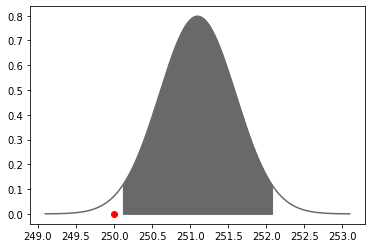

In [30]:
#6)
mean=250
sd = 2.5
x = np.linspace(X.mean()-4*sd/np.sqrt(len(X)), X.mean()+4*sd/np.sqrt(len(X)), 1000)
y = stats.norm.pdf(x, X.mean(), sd/np.sqrt(len(X)))
plt.plot(x,y, color = 'dimgrey')
 
b_min = stats.norm.ppf(0.025, X.mean(), sd/np.sqrt(len(X)))
b_max = stats.norm.ppf(0.975, X.mean(), sd/np.sqrt(len(X)))
 
xf = np.linspace(b_min,b_max, 100)
plt.fill_between(xf, stats.norm.pdf(xf, X.mean(), sd/np.sqrt(len(X))), color = 'dimgrey')
 
plt.plot(mean, 0, 'ro')
plt.show()

In [26]:
#7) 
prob = stats.t.cdf(X.mean(), df=len(X)-1, loc=250, scale=X.std(ddof=1)/np.sqrt(len(X)))
p_val = 2*min(prob, 1-prob)
print('p_value = ', p_val) #p_value =  0.06598787


p_value =  0.06598787079213086


In [27]:
#8) 
print('No as the P_value is bigger than than 0.05 ')

No as the P_value is bigger than than 0.05 


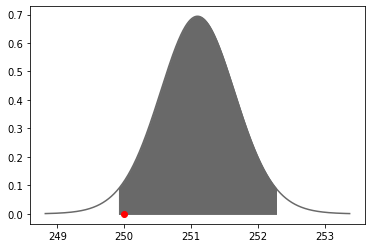

In [29]:
#9) 
plt.figure()
mean=250
x = np.linspace(X.mean()-4*X.std(ddof=1)/np.sqrt(len(X)), X.mean()+4*X.std(ddof=1)/np.sqrt(len(X)), 1000)
y = stats.t.pdf(x,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
plt.plot(x,y, color = 'dimgrey')
 
b_min = stats.t.ppf(0.025,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
b_max = stats.t.ppf(0.975,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
 
xf = np.linspace(b_min,b_max, 1000)
plt.fill_between(xf, stats.t.pdf(xf,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X))), color = 'dimgrey')
 
plt.plot(mean, 0, 'ro')
plt.show()

# Assignment 7

In [30]:
p_val=stats.binom.sf(k=10, n=15, p=0.5)
print('P_value = ',p_val)
# Can also be calculated in the following way:
p_val=stats.binom.pmf(k=[11,12,13,14,15], n=15, p=0.5)
print('P_value = ',sum(p_val))

print("As the P-value > significance level of 0.05 we cannot reject the null-hypothesis. ")

P_value =  0.059234619140624986
P_value =  0.059234619140625173
As the P-value > significance level of 0.05 we cannot reject the null-hypothesis. 


# Assignment 8

In [31]:
Significance_level = 0.05
obs = [[72,44],[34,53]]
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(obs, correction=False)
print('P_value = ',p_val)
if p_val<0.05:
    print("Since the p_value is smaller than the sinificance level (" +str(round(p_val,5))+"<"+str(Significance_level)+") we can reject the null hypothesis. The varialbes are dependent on each other. ")
else:
    print("Since the p_value is greater than the sinificance level (" +str(round(p_val,5))+">"+str(Significance_level)+") we cannot reject the null hypothesis. The varialbes are independent on each other. ")


P_value =  0.0011746947930915239
Since the p_value is smaller than the sinificance level (0.00117<0.05) we can reject the null hypothesis. The varialbes are dependent on each other. 


# Assignment 9

In [32]:
Significance_level = 0.05
obs = [[26,13,5],[20,29,7]]
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(obs, correction=False)

if p_val<0.05:
    print("Since the p_value is smaller than the sinificance level (" +str(round(p_val,5))+"<"+str(Significance_level)+") we can reject the null hypothesis. The varialbes are dependent on each other. ")
else:
    print("Since the p_value is greater than the sinificance level (" +str(round(p_val,5))+">"+str(Significance_level)+") we cannot reject the null hypothesis. The varialbes are independent on each other. ")



Since the p_value is greater than the sinificance level (0.05352>0.05) we cannot reject the null hypothesis. The varialbes are independent on each other. 


# Assignment 10

In [58]:
data = pd.read_csv("adult.data.csv") 
print (dataB.head(7)) 

#1)
dataB = data[data[' Bachelors'].isin([' Bachelors' , ' Masters'])]

data_crosstab = pd.crosstab(dataB[' <=50K'], dataB[' Bachelors'], margins = False) 
print(data_crosstab)

    39          State-gov   77516   Bachelors   13        Never-married  \
0   50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
3   28            Private  338409   Bachelors   13   Married-civ-spouse   
4   37            Private  284582     Masters   14   Married-civ-spouse   
7   31            Private   45781     Masters   14        Never-married   
8   42            Private  159449   Bachelors   13   Married-civ-spouse   
10  30          State-gov  141297   Bachelors   13   Married-civ-spouse   
11  23            Private  122272   Bachelors   13        Never-married   

        Adm-clerical   Not-in-family                White     Male   2174   0  \
0    Exec-managerial         Husband                White     Male      0   0   
3     Prof-specialty            Wife                Black   Female      0   0   
4    Exec-managerial            Wife                White   Female      0   0   
7     Prof-specialty   Not-in-family                White   Female  14084  

In [59]:
#2)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print("As the p-value is less than 0.05 salery depends on wether you have a Master or a bachellor")

'p-value = 7.899312840404235e-25'

'degrees of freedom = 1'

As the p-value is less than 0.05 salery depends on wether you have a Master or a bachellor


In [60]:
#3)
dataS = data[data[' State-gov'].isin([' State-gov' , ' Private'])]
data_crosstab = pd.crosstab(dataS[' State-gov'], dataS[' <=50K'], margins = False) 
print(data_crosstab)

 <=50K       <=50K   >50K
 State-gov               
 Private     17733   4963
 State-gov     944    353


In [61]:
#4)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print("As the p-value is less than 0.05 salery depends on wether you work for the Public or the Private")

'p-value = 6.430111938009106e-06'

'degrees of freedom = 1'

As the p-value is less than 0.05 salery depends on wether you work for the Public or the Private
